# Fintech Sector Portfolio Analysis

(Insert project description)

(Insert table of contents with clickable anchor links)

In [1]:
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
import yfinance as yf

## Collect and Clean Data

### Create a function to generate a daily returns DataFrame for a given list of stocks within a fintech sector

In [2]:
def get_daily_returns_df(yf_tickers, ticker_names, period):
    """
    Returns a pandas DataFrame where each column are daily returns for the provided stocks. 
    Prints out each step of the data
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks, currently assumes that there will be 3 stocks 
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame with each stock's daily return data
    
    """
    
    # create pandas DataFrames for each stock in the yf ticker object, based on provided time period
    t1_df = yf_tickers.tickers[ticker_names[0]].history(period=period)
    t2_df = yf_tickers.tickers[ticker_names[1]].history(period=period)
    t3_df = yf_tickers.tickers[ticker_names[2]].history(period=period)

    # print out each DataFrame to verify data collection 
    print(f'{ticker_names[0]} DataFrame')
    display(t1_df.head())
    display(t1_df.tail())

    print(f'{ticker_names[1]} DataFrame')
    display(t2_df.head())
    display(t2_df.tail())

    print(f'{ticker_names[2]} DataFrame')
    display(t3_df.head())
    display(t3_df.tail())
    print('\n')

    # select only the close column from the DataFrames 
    t1_df = t1_df[['Close']]
    t2_df = t2_df[['Close']]
    t3_df = t3_df[['Close']]

    # concat close data into one DataFrame 
    daily_returns_df = pd.concat([t1_df, t2_df, t3_df], axis=1)

    # rename columns to each stock ticker instead of just "Close"
    daily_returns_df.columns = ticker_names

    # print out the resulting DataFrame to verify correct closing price data
    print(f'Closing price DataFrame for {ticker_names[0]}, {ticker_names[1]}, {ticker_names[2]}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())
    print('\n')

    # convert closing prices to daily returns 
    daily_returns_df = daily_returns_df.pct_change().dropna()

    # print final daily returns DataFrame
    print(f'Daily returns DataFrame for {ticker_names[0]}, {ticker_names[1]}, {ticker_names[2]}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())

    return daily_returns_df

### Get 5 years of data for Paytech sector - PayPal, Square, and MasterCard

In [3]:
# create yfinance ticker object for paytech stocks
paytech_tickers = yf.Tickers('pypl sq ma')

# use tickers and 5 year period to get 5 years of paytech stock data 
paytech_daily_returns =  get_daily_returns_df(paytech_tickers, ['PYPL', 'SQ', 'MA'], '5y')

PYPL DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,75.589996,75.744003,68.610001,70.970001,26283600,0,0
2017-12-05 00:00:00-05:00,69.809998,72.750000,69.610001,71.199997,16634000,0,0
2017-12-06 00:00:00-05:00,70.889999,73.199997,70.830002,73.139999,9331400,0,0
2017-12-07 00:00:00-05:00,73.250000,74.069000,73.250000,73.690002,7937700,0,0
2017-12-08 00:00:00-05:00,74.709999,74.709999,72.599998,72.910004,8350400,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,79.930000,82.919998,79.639999,79.930000,11282600,0,0
2022-11-29 00:00:00-05:00,79.230003,80.750000,77.260002,77.639999,15491100,0,0
2022-11-30 00:00:00-05:00,77.699997,79.110001,75.320000,78.410004,25747300,0,0
2022-12-01 00:00:00-05:00,79.110001,80.746002,78.139999,78.529999,15189000,0,0
2022-12-02 00:00:00-05:00,76.820000,77.059998,74.519997,74.660004,24212900,0,0


SQ DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,38.410000,38.689999,35.900002,36.869999,29566900,0,0
2017-12-05 00:00:00-05:00,36.750000,38.590000,36.740002,37.599998,21276200,0,0
2017-12-06 00:00:00-05:00,37.730000,39.770000,37.270000,37.610001,28820400,0,0
2017-12-07 00:00:00-05:00,39.325001,39.459999,37.959999,38.730000,23721600,0,0
2017-12-08 00:00:00-05:00,39.610001,39.790001,37.939999,38.090000,20917800,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,61.910000,63.830002,61.119999,61.369999,7239900,0,0
2022-11-29 00:00:00-05:00,62.070000,63.889999,61.730000,62.110001,8219900,0,0
2022-11-30 00:00:00-05:00,62.099998,68.000000,61.852001,67.769997,14298600,0,0
2022-12-01 00:00:00-05:00,68.019997,69.239998,66.660004,69.169998,9430000,0,0
2022-12-02 00:00:00-05:00,67.269997,68.940002,66.620003,68.180000,7716000,0,0


MA DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,145.915689,146.567792,139.550377,139.599030,7490100,0.0,0
2017-12-05 00:00:00-05:00,139.861819,142.411849,136.854355,141.253632,6807100,0.0,0
2017-12-06 00:00:00-05:00,141.195244,144.115115,140.757252,143.482468,3752000,0.0,0
2017-12-07 00:00:00-05:00,143.570066,146.392617,143.570066,145.458252,3417900,0.0,0
2017-12-08 00:00:00-05:00,146.402394,146.421864,145.185780,145.886551,2521500,0.0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,346.679993,350.230011,343.230011,344.589996,2226200,0.0,0
2022-11-29 00:00:00-05:00,343.649994,344.720001,340.750000,343.130005,1724200,0.0,0
2022-11-30 00:00:00-05:00,342.850006,356.399994,341.480011,356.399994,4251300,0.0,0
2022-12-01 00:00:00-05:00,357.989990,361.579987,354.049988,360.799988,3374700,0.0,0
2022-12-02 00:00:00-05:00,357.450012,362.290009,356.059998,360.059998,2015500,0.0,0




Closing price DataFrame for PYPL, SQ, MA


,PYPL,SQ,MA
Date,,,
2017-12-04 00:00:00-05:00,70.970001,36.869999,139.599030
2017-12-05 00:00:00-05:00,71.199997,37.599998,141.253632
2017-12-06 00:00:00-05:00,73.139999,37.610001,143.482468
2017-12-07 00:00:00-05:00,73.690002,38.730000,145.458252
2017-12-08 00:00:00-05:00,72.910004,38.090000,145.886551


,PYPL,SQ,MA
Date,,,
2022-11-28 00:00:00-05:00,79.930000,61.369999,344.589996
2022-11-29 00:00:00-05:00,77.639999,62.110001,343.130005
2022-11-30 00:00:00-05:00,78.410004,67.769997,356.399994
2022-12-01 00:00:00-05:00,78.529999,69.169998,360.799988
2022-12-02 00:00:00-05:00,74.660004,68.180000,360.059998




Daily returns DataFrame for PYPL, SQ, MA


,PYPL,SQ,MA
Date,,,
2017-12-05 00:00:00-05:00,0.003241,0.019799,0.011853
2017-12-06 00:00:00-05:00,0.027247,0.000266,0.015779
2017-12-07 00:00:00-05:00,0.007520,0.029779,0.013770
2017-12-08 00:00:00-05:00,-0.010585,-0.016525,0.002944
2017-12-11 00:00:00-05:00,0.005212,0.005513,0.006604


,PYPL,SQ,MA
Date,,,
2022-11-28 00:00:00-05:00,-0.001873,-0.031714,-0.019073
2022-11-29 00:00:00-05:00,-0.028650,0.012058,-0.004237
2022-11-30 00:00:00-05:00,0.009918,0.091129,0.038673
2022-12-01 00:00:00-05:00,0.001530,0.020658,0.012346
2022-12-02 00:00:00-05:00,-0.049280,-0.014313,-0.002051


### Get 5 years of data for Lending sector - LendingTree, LendingClub, Black Knight

In [4]:
# create yfinance ticker object for lending stocks
lending_tickers = yf.Tickers('tree lc bki')

# use tickers and 5 year period to get 5 years of lending stock data 
lending_daily_returns =  get_daily_returns_df(lending_tickers, ['TREE', 'LC', 'BKI'], '5y')

TREE DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,309.850006,316.250000,301.450012,303.399994,246900,0,0
2017-12-05 00:00:00-05:00,301.950012,313.299988,298.609985,305.200012,185000,0,0
2017-12-06 00:00:00-05:00,305.350006,310.799988,304.200012,306.899994,190300,0,0
2017-12-07 00:00:00-05:00,307.049988,316.600006,305.980011,311.250000,125300,0,0
2017-12-08 00:00:00-05:00,314.950012,319.429993,308.899994,315.049988,258700,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,23.379999,23.379999,22.200001,22.370001,235900,0,0
2022-11-29 00:00:00-05:00,22.500000,23.459999,22.010000,23.330000,262400,0,0
2022-11-30 00:00:00-05:00,23.200001,23.990000,21.750000,23.950001,376000,0,0
2022-12-01 00:00:00-05:00,24.000000,25.240000,23.170000,25.120001,256900,0,0
2022-12-02 00:00:00-05:00,24.250000,25.110001,23.629999,24.980000,204100,0,0


LC DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,21.950001,22.275000,21.350000,21.850000,1400220,0,0.0
2017-12-05 00:00:00-05:00,21.850000,21.950001,21.250000,21.250000,1117300,0,0.0
2017-12-06 00:00:00-05:00,21.150000,21.400000,20.799999,21.250000,1079140,0,0.0
2017-12-07 00:00:00-05:00,18.549999,19.700001,16.450001,17.950001,9593000,0,0.0
2017-12-08 00:00:00-05:00,18.700001,18.700001,17.299999,17.549999,4030720,0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,10.37,10.470,9.920,10.06,2000200,0,0.0
2022-11-29 00:00:00-05:00,10.04,10.435,10.040,10.26,859700,0,0.0
2022-11-30 00:00:00-05:00,10.14,10.395,9.930,10.31,1532500,0,0.0
2022-12-01 00:00:00-05:00,10.42,10.550,10.195,10.24,1034500,0,0.0
2022-12-02 00:00:00-05:00,10.19,10.375,9.990,10.18,1111000,0,0.0


BKI DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,45.299999,45.950001,44.450001,44.799999,1036300,0,0
2017-12-05 00:00:00-05:00,44.799999,45.549999,44.799999,44.900002,774600,0,0
2017-12-06 00:00:00-05:00,44.799999,45.099998,44.250000,44.349998,516100,0,0
2017-12-07 00:00:00-05:00,44.250000,45.125000,44.060001,45.049999,445400,0,0
2017-12-08 00:00:00-05:00,45.200001,45.724998,44.950001,45.549999,625700,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,62.549999,63.060001,61.070000,61.160000,469900,0,0
2022-11-29 00:00:00-05:00,60.959999,61.639999,60.349998,60.750000,853500,0,0
2022-11-30 00:00:00-05:00,61.000000,62.299999,60.470001,61.990002,1686800,0,0
2022-12-01 00:00:00-05:00,62.040001,63.310001,61.709999,61.950001,678500,0,0
2022-12-02 00:00:00-05:00,61.040001,62.130001,60.930000,61.389999,633500,0,0




Closing price DataFrame for TREE, LC, BKI


,TREE,LC,BKI
Date,,,
2017-12-04 00:00:00-05:00,303.399994,21.850000,44.799999
2017-12-05 00:00:00-05:00,305.200012,21.250000,44.900002
2017-12-06 00:00:00-05:00,306.899994,21.250000,44.349998
2017-12-07 00:00:00-05:00,311.250000,17.950001,45.049999
2017-12-08 00:00:00-05:00,315.049988,17.549999,45.549999


,TREE,LC,BKI
Date,,,
2022-11-28 00:00:00-05:00,22.370001,10.06,61.160000
2022-11-29 00:00:00-05:00,23.330000,10.26,60.750000
2022-11-30 00:00:00-05:00,23.950001,10.31,61.990002
2022-12-01 00:00:00-05:00,25.120001,10.24,61.950001
2022-12-02 00:00:00-05:00,24.980000,10.18,61.389999




Daily returns DataFrame for TREE, LC, BKI


,TREE,LC,BKI
Date,,,
2017-12-05 00:00:00-05:00,0.005933,-0.027460,0.002232
2017-12-06 00:00:00-05:00,0.005570,0.000000,-0.012250
2017-12-07 00:00:00-05:00,0.014174,-0.155294,0.015784
2017-12-08 00:00:00-05:00,0.012209,-0.022284,0.011099
2017-12-11 00:00:00-05:00,-0.019521,0.108262,0.001098


,TREE,LC,BKI
Date,,,
2022-11-28 00:00:00-05:00,-0.051717,-0.047348,-0.024406
2022-11-29 00:00:00-05:00,0.042915,0.019881,-0.006704
2022-11-30 00:00:00-05:00,0.026575,0.004873,0.020412
2022-12-01 00:00:00-05:00,0.048852,-0.006790,-0.000645
2022-12-02 00:00:00-05:00,-0.005573,-0.005859,-0.009040


### Get 5 years of data for Banking sector - Fiserv, Jack Henry & Associates, FIS (Fidelity National Information Services)

In [5]:
# create yfinance ticker object for banking stocks
banking_tickers = yf.Tickers('fisv jkhy fis')

# use tickers and 5 year period to get 5 years of lending stock data 
banking_daily_returns =  get_daily_returns_df(banking_tickers, ['FISV', 'JKHY', 'FIS'], '5y')

FISV DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,65.695000,66.555000,65.464996,66.120003,2270000,0,0.0
2017-12-05 00:00:00-05:00,66.120003,66.285004,65.309998,65.440002,1550200,0,0.0
2017-12-06 00:00:00-05:00,65.570000,65.754997,65.004997,65.279999,1658200,0,0.0
2017-12-07 00:00:00-05:00,65.154999,65.699997,65.010002,65.599998,1431200,0,0.0
2017-12-08 00:00:00-05:00,65.945000,66.059998,65.635002,65.860001,1142400,0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,102.150002,102.889999,101.470001,101.760002,2867800,0,0.0
2022-11-29 00:00:00-05:00,101.739998,102.750000,101.209999,101.519997,3194500,0,0.0
2022-11-30 00:00:00-05:00,100.720001,104.989998,100.720001,104.360001,5573000,0,0.0
2022-12-01 00:00:00-05:00,104.360001,105.500000,103.980003,105.029999,3086900,0,0.0
2022-12-02 00:00:00-05:00,103.370003,105.849998,103.370003,105.459999,2881700,0,0.0


JKHY DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,108.367455,109.947871,107.742855,109.285423,380300,0.0,0
2017-12-05 00:00:00-05:00,109.257011,109.493600,108.433684,108.613487,430000,0.0,0
2017-12-06 00:00:00-05:00,109.787002,111.130829,109.626116,109.663971,364300,0.0,0
2017-12-07 00:00:00-05:00,109.673420,110.657633,109.455762,110.544067,432600,0.0,0
2017-12-08 00:00:00-05:00,110.988856,111.329545,110.562998,110.998322,202100,0.0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,189.569010,191.842999,187.813639,188.302353,402500,0.00,0
2022-11-29 00:00:00-05:00,188.212594,189.140136,183.395324,185.409988,481600,0.00,0
2022-11-30 00:00:00-05:00,185.330002,190.360001,185.160004,189.350006,837600,0.49,0
2022-12-01 00:00:00-05:00,189.750000,191.610001,188.270004,190.729996,531800,0.00,0
2022-12-02 00:00:00-05:00,188.500000,192.330002,188.289993,191.600006,490000,0.00,0


FIS DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,88.692203,88.757887,87.819544,87.857079,1668400,0.0,0
2017-12-05 00:00:00-05:00,88.025977,89.358429,87.547427,89.302124,2017200,0.0,0
2017-12-06 00:00:00-05:00,89.105093,89.649334,88.607772,89.424133,1817100,0.0,0
2017-12-07 00:00:00-05:00,89.546103,90.090344,89.330281,89.958977,2004000,0.0,0
2017-12-08 00:00:00-05:00,90.240478,90.493835,89.621175,89.940208,1683500,0.0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,65.330002,67.169998,65.169998,65.529999,6872700,0.0,0
2022-11-29 00:00:00-05:00,65.699997,68.680000,65.550003,67.529999,8373600,0.0,0
2022-11-30 00:00:00-05:00,67.930000,72.620003,67.709999,72.580002,13852900,0.0,0
2022-12-01 00:00:00-05:00,72.690002,74.300003,72.349998,73.180000,8105200,0.0,0
2022-12-02 00:00:00-05:00,72.750000,75.000000,72.589996,74.059998,8741500,0.0,0




Closing price DataFrame for FISV, JKHY, FIS


,FISV,JKHY,FIS
Date,,,
2017-12-04 00:00:00-05:00,66.120003,109.285423,87.857079
2017-12-05 00:00:00-05:00,65.440002,108.613487,89.302124
2017-12-06 00:00:00-05:00,65.279999,109.663971,89.424133
2017-12-07 00:00:00-05:00,65.599998,110.544067,89.958977
2017-12-08 00:00:00-05:00,65.860001,110.998322,89.940208


,FISV,JKHY,FIS
Date,,,
2022-11-28 00:00:00-05:00,101.760002,188.302353,65.529999
2022-11-29 00:00:00-05:00,101.519997,185.409988,67.529999
2022-11-30 00:00:00-05:00,104.360001,189.350006,72.580002
2022-12-01 00:00:00-05:00,105.029999,190.729996,73.180000
2022-12-02 00:00:00-05:00,105.459999,191.600006,74.059998




Daily returns DataFrame for FISV, JKHY, FIS


,FISV,JKHY,FIS
Date,,,
2017-12-05 00:00:00-05:00,-0.010284,-0.006148,0.016448
2017-12-06 00:00:00-05:00,-0.002445,0.009672,0.001366
2017-12-07 00:00:00-05:00,0.004902,0.008025,0.005981
2017-12-08 00:00:00-05:00,0.003963,0.004109,-0.000209
2017-12-11 00:00:00-05:00,0.000835,-0.003410,-0.001461


,FISV,JKHY,FIS
Date,,,
2022-11-28 00:00:00-05:00,-0.007123,-0.013687,-0.006820
2022-11-29 00:00:00-05:00,-0.002359,-0.015360,0.030520
2022-11-30 00:00:00-05:00,0.027975,0.021250,0.074782
2022-12-01 00:00:00-05:00,0.006420,0.007288,0.008267
2022-12-02 00:00:00-05:00,0.004094,0.004561,0.012025


## Data Analysis and Calculations

# Monte Carlo Simulations

## Reformat sector DataFrames to be usable by MCSimulation module

In [10]:
# collect data 
paytech_df = pd.concat(
    [
        paytech_tickers.tickers['PYPL'].history(period='5y').drop(['Dividends', 'Stock Splits'], axis=1),
        paytech_tickers.tickers['SQ'].history(period='5y').drop(['Dividends', 'Stock Splits'], axis=1),
        paytech_tickers.tickers['MA'].history(period='5y').drop(['Dividends', 'Stock Splits'], axis=1),
    ],
    axis=1,
    keys=['PYPL', 'SQ', 'MA']
)

paytech_df = paytech_df.rename(columns={'Close': 'close'})

paytech_df

PYPL                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-04 00:00:00-05:00  75.589996  75.744003  68.610001  70.970001   
2017-12-05 00:00:00-05:00  69.809998  72.750000  69.610001  71.199997   
2017-12-06 00:00:00-05:00  70.889999  73.199997  70.830002  73.139999   
2017-12-07 00:00:00-05:00  73.250000  74.069000  73.250000  73.690002   
2017-12-08 00:00:00-05:00  74.709999  74.709999  72.599998  72.910004   
...                              ...        ...        ...        ...   
2022-11-28 00:00:00-05:00  79.930000  82.919998  79.639999  79.930000   
2022-11-29 00:00:00-05:00  79.230003  80.750000  77.260002  77.639999   
2022-11-30 00:00:00-05:00  77.699997  79.110001  75.320000  78.410004   
2022-12-01 00:00:00-05:00  79.110001  80.746002  78.139999  78.529999   
2022-12-02 00:00:00-05:00  76.820000  77.059998  74.519997  74.660004   

                                            SQ                        \
                             Volume       Open       High        Low   
Date                                                                   
2017-12-04 00:00:00-05:00  26283600  38.410000  38.689999  35.900002   
2017-12-05 00:00:00-05:00  16634000  36.750000  38.590000  36.740002   
2017-12-06 00:00:00-05:00   9331400  37.730000  39.770000  37.270000   
2017-12-07 00:00:00-05:00   7937700  39.325001  39.459999  37.959999   
2017-12-08 00:00:00-05:00   8350400  39.610001  39.790001  37.939999   
...                             ...        ...        ...        ...   
2022-11-28 00:00:00-05:00  11282600  61.910000  63.830002  61.119999   
2022-11-29 00:00:00-05:00  15491100  62.070000  63.889999  61.730000   
2022-11-30 00:00:00-05:00  25747300  62.099998  68.000000  61.852001   
2022-12-01 00:00:00-05:00  15189000  68.019997  69.239998  66.660004   
2022-12-02 00:00:00-05:00  24212900  67.269997  68.940002  66.620003   

                                                        MA              \
                               close    Volume        Open        High   
Date                                                                     
2017-12-04 00:00:00-05:00  36.869999  29566900  145.915641  146.567744   
2017-12-05 00:00:00-05:00  37.599998  21276200  139.861819  142.411849   
2017-12-06 00:00:00-05:00  37.610001  28820400  141.195244  144.115115   
2017-12-07 00:00:00-05:00  38.730000  23721600  143.570036  146.392587   
2017-12-08 00:00:00-05:00  38.090000  20917800  146.402333  146.421803   
...                              ...       ...         ...         ...   
2022-11-28 00:00:00-05:00  61.369999   7239900  346.679993  350.230011   
2022-11-29 00:00:00-05:00  62.110001   8219900  343.649994  344.720001   
2022-11-30 00:00:00-05:00  67.769997  14298600  342.850006  356.399994   
2022-12-01 00:00:00-05:00  69.169998   9430000  357.989990  361.579987   
2022-12-02 00:00:00-05:00  68.180000   7716000  357.450012  362.290009   

                                                            
                                  Low       close   Volume  
Date                                                        
2017-12-04 00:00:00-05:00  139.550331  139.598984  7490100  
2017-12-05 00:00:00-05:00  136.854355  141.253632  6807100  
2017-12-06 00:00:00-05:00  140.757252  143.482468  3752000  
2017-12-07 00:00:00-05:00  143.570036  145.458221  3417900  
2017-12-08 00:00:00-05:00  145.185720  145.886490  2521500  
...                               ...         ...      ...  
2022-11-28 00:00:00-05:00  343.230011  344.589996  2226200  
2022-11-29 00:00:00-05:00  340.750000  343.130005  1724200  
2022-11-30 00:00:00-05:00  341.480011  356.399994  4251300  
2022-12-01 00:00:00-05:00  354.049988  360.799988  3374700  
2022-12-02 00:00:00-05:00  356.059998  360.059998  2015500  

[1259 rows x 15 columns]

In [11]:
# create MCSimulation object
mc_test = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*5
)

In [12]:
mc_test.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ethansilvas/Projects/fintech-sector-portfolio-analysis/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993989,0.983515,1.025875,1.008404,1.006595,1.000099,0.970416,1.009763,0.993771,0.983533,...,1.018644,1.034460,1.001631,0.994881,1.018471,0.991017,1.037802,0.992637,1.000489,0.991461
2,0.997719,0.984210,1.007528,1.007213,1.029214,1.015918,0.962920,1.001911,0.993924,0.992766,...,1.017831,1.018393,0.976151,1.012992,1.037755,1.005155,1.040989,1.009285,0.999281,0.998465
3,1.012402,0.985080,1.017315,1.010062,1.013190,0.999461,0.938034,0.991277,0.989230,1.008926,...,1.032615,1.051793,0.950003,1.027156,1.007235,0.996143,1.038203,0.976829,0.982989,1.036542
4,0.995061,1.012808,1.023379,1.011880,1.012598,0.975154,0.961524,1.018728,0.993142,1.035859,...,1.033339,1.025949,0.956353,1.015786,1.031680,1.032779,1.040863,0.974122,0.993206,1.028580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.249796,2.702241,2.452544,3.188708,1.306394,2.635775,0.846205,7.634788,6.130707,0.433470,...,1.116908,1.619209,4.026926,1.047470,1.762510,1.721064,4.083114,3.816491,2.091554,1.111481
1257,3.138364,2.706156,2.468190,3.142849,1.322174,2.632816,0.827337,7.730514,6.202726,0.420622,...,1.109106,1.645814,4.095184,1.050942,1.778184,1.717389,3.977322,3.816816,2.149420,1.094718
1258,3.098156,2.723620,2.399804,3.113597,1.363812,2.610623,0.835809,7.793913,6.191148,0.412004,...,1.120103,1.691122,4.046941,1.047819,1.737902,1.677774,4.011818,3.861088,2.127971,1.103255
1259,3.173101,2.716001,2.396833,3.025314,1.411522,2.631837,0.854326,7.669921,6.118925,0.408540,...,1.100701,1.693701,3.966467,1.034420,1.718303,1.721855,3.972456,3.835102,2.103030,1.112265


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

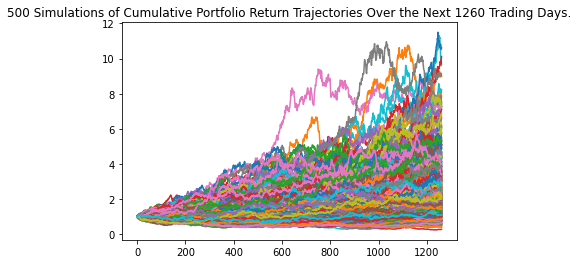

In [13]:
mc_test.plot_simulation()